## Decision_Tree

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

df = pd.read_csv("../2_data/telcocustomerchurn_featured.csv")
print(df.columns.tolist())
print(df.dtypes)

['Unnamed: 0', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV', 'LoyaltyID', 'Partner', 'Tenure', 'Monthly Charges', 'Churn', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Cont

In [23]:
churn_columns = [col for col in df.columns if 'Churn' in col]
print(churn_columns)

['Churn Value', 'Churn Score', 'Churn', 'Customer Status_Churned', 'Churn Category_Attitude', 'Churn Category_Competitor', 'Churn Category_Dissatisfaction', 'Churn Category_Other', 'Churn Category_Price', 'Churn Reason_Attitude of service provider', 'Churn Reason_Attitude of support person', 'Churn Reason_Competitor had better devices', 'Churn Reason_Competitor made better offer', 'Churn Reason_Competitor offered higher download speeds', 'Churn Reason_Competitor offered more data', 'Churn Reason_Deceased', "Churn Reason_Don't know", 'Churn Reason_Extra data charges', 'Churn Reason_Lack of affordable download/upload speed', 'Churn Reason_Lack of self-service on Website', 'Churn Reason_Limited range of services', 'Churn Reason_Long distance charges', 'Churn Reason_Moved', 'Churn Reason_Network reliability', 'Churn Reason_Poor expertise of online support', 'Churn Reason_Poor expertise of phone support', 'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction', 'Churn Reason_S

In [24]:
# Drop all columns containing "Churn" in their name except the "Churn" column
churn_columns_to_drop = [col for col in churn_columns if col != 'Churn']
df = df.drop(columns=churn_columns_to_drop)

# Display the remaining columns
print(df.columns.tolist())

['Unnamed: 0', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'LoyaltyID', 'Partner', 'Tenure', 'Monthly Charges', 'Churn', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contrac

In [25]:
# Define the features and target variable
X = df.drop(columns=['Churn', 'Unnamed: 0', 'Customer Status_Joined', 'Customer Status_Stayed'])
y = df['Churn']

# StratifiedShuffleSplit 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
print(sss)

for train_index, test_index in sss.split(X, y):
    print("train:", train_index, "test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y shape: {y.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Save the train and test splits to CSV files
X_train.to_csv("../2_data/X_train.csv", index=False)
X_test.to_csv("../2_data/X_test.csv", index=False)
y_train.to_csv("../2_data/y_train.csv", index=False)
y_test.to_csv("../2_data/y_test.csv", index=False)

StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None)
train: [4486 1855 3910 ... 4687  690 5658] test: [ 724  945 4710 ... 3730 1633 2496]
train: [ 937 6833 3567 ... 4257 4716 5657] test: [6171  505 5903 ... 6911 2257 5571]
train: [4793 2570 3406 ...  805 2103 1162] test: [  31 2128 2079 ... 2313 6356 5365]
train: [6799  180 3061 ... 3155 2428  793] test: [3083 4441  980 ... 4552 2903 1479]
train: [ 603 4034 6970 ... 1356 4927 1489] test: [5931 4868 2690 ... 3344 6206 5245]
X shape: (7043, 84)
X_train shape: (5634, 84)
X_test shape: (1409, 84)
y shape: (7043,)
y_train shape: (5634,)
y_test shape: (1409,)


In [26]:
# Print the columns of the dataframe
print(X_train.columns.tolist())

['Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'LoyaltyID', 'Partner', 'Tenure', 'Monthly Charges', 'Country_United States', 'State_California', 'Quarter_Q3', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_


Remaining features after cleaning: ['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'LoyaltyID', 'Partner', 'Tenure', 'Monthly Charges', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Bank 

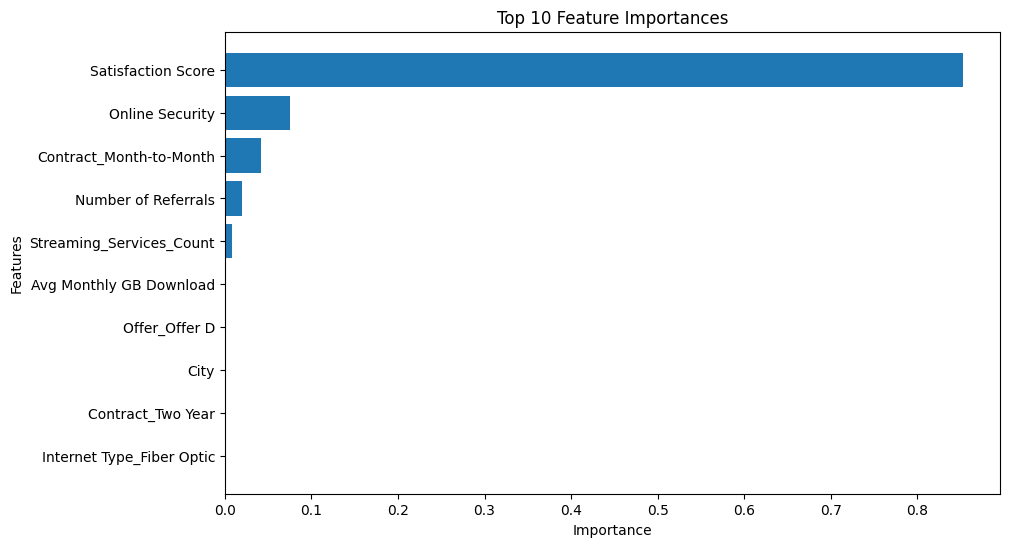

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def clean_features(X):

    cols_to_remove = ['Unnamed: 0', 'Customer Status_Stayed', 'Customer Status_Joined']
    for col in cols_to_remove:
        if col in X.columns:
            X = X.drop(columns=[col])
    
  
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    low_variance_features = [
        col for col in numeric_cols if X[col].var() < 0.01
    ]
    X = X.drop(columns=low_variance_features)
    
    return X, low_variance_features

def evaluate_decision_tree(X, y):
 
 
    X_cleaned, dropped_features = clean_features(X)
    print(f"\nRemaining features after cleaning: {X_cleaned.columns.tolist()}")
    

    X_processed = pd.get_dummies(X_cleaned, drop_first=True)
    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=0.2, stratify=y, random_state=42
    )
    
    
    param_grid = {
        'max_depth': [3, 4, 5],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [10, 20],
        'criterion': ['gini', 'entropy'],
        'class_weight': ['balanced']
    }
    
  
    dt = DecisionTreeClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
   
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    print("\nBest Parameters:", grid_search.best_params_)
    print(f"Best Cross-validation Score: {grid_search.best_score_:.4f}")
    
    y_pred_test = best_model.predict(X_test)
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test)
    }
    print("\nTest Set Performance:")
    for metric, score in test_scores.items():
        print(f"{metric.capitalize()}: {score:.4f}")
    
    feature_importance = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': X_processed.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))
    
    print("\nDropped features during cleaning:", dropped_features)
    
    return best_model, importance_df, test_scores

def plot_feature_importance(importance_df):
    """plot"""
    top_features = importance_df.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['feature'], top_features['importance'], align='center')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()



best_model, feature_importance, test_scores = evaluate_decision_tree(X, y)


plot_feature_importance(feature_importance)


In [9]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv("../2_data/telcocustomerchurn_featured.csv")  
X = df.drop(columns=['LoyaltyID', 'Churn'])  
y = df['Churn']


X_train = X[:-10]
y_train = y[:-10]
pred_X = X.tail(10)
pre_id = df['LoyaltyID'].tail(10)


model = GaussianNB()
model.fit(X_train, y_train)


pred_y = model.predict(pred_X)


predDf = pd.DataFrame({'customerID': pre_id, 'Churn': pred_y})
print(predDf)


      customerID  Churn
7033      100727      0
7034      216561      0
7035      521311      0
7036      910495      1
7037      362855      1
7038      526659      0
7039      489459      1
7040      992850      0
7041      345743      0
7042      388390      0
